In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

import numpy as np


In [4]:
ediri = r'C:\Users\apbarret\Documents\data\Arctic_precip'
efile = r'NPP-yang_copy_apb.xls'
df = pd.read_excel(os.path.join(ediri, efile), sheet_name='monthly-all', header=0, skiprows=[1,2,3], 
                   na_values='-', usecols=14)
df = df.dropna(how='all')


In [5]:
df.head()

,NP,YY,MM,ND,Lat,Lon,Tmn,Ug,DP,Dtc,snow%,Pg,windC,traceC,Pc
0,31.0,89.0,1.0,31.0,74.51,-150.67,-31.2,4.7,5.0,25.0,100.0,2.0,1.5,2.5,6.0
1,31.0,89.0,2.0,28.0,74.70,-147.57,-20.3,4.7,19.0,8.0,100.0,21.3,20.3,0.8,42.4
2,31.0,89.0,3.0,31.0,75.30,-146.08,-28.8,3.9,6.0,24.0,100.0,4.3,4.3,2.4,11.0
3,31.0,89.0,4.0,30.0,75.48,-146.26,-22.2,3.6,9.0,20.0,100.0,5.1,2.6,2.0,9.7
4,31.0,89.0,5.0,31.0,75.46,-146.25,-11.2,3.2,18.0,12.0,100.0,7.4,2.9,1.2,11.5


## Make 1979 to 1991 mean

In [6]:
dfAvg = df[df['YY'] >= 79].groupby('MM').mean()[['Pc','DP','Dtc','snow%']]
dfAvg['Psn'] = dfAvg['Pc'] * df['snow%'] / 100.
dfAvg['DPtot'] = dfAvg['DP'] + dfAvg['Dtc']
dfAvg

,Pc,DP,Dtc,snow%,Psn,DPtot
MM,,,,,,
1.0,19.138095,11.523810,18.476190,100.000000,19.138095,30.000000
2.0,17.671429,11.095238,16.190476,100.000000,17.671429,27.285714
3.0,20.250000,10.000000,20.000000,99.925000,20.250000,30.000000
4.0,11.423529,7.529412,21.470588,100.000000,11.423529,29.000000
5.0,14.843750,12.250000,17.750000,100.000000,14.843750,30.000000
6.0,14.938889,13.444444,15.555556,87.066667,9.052967,29.000000
7.0,29.920000,15.400000,14.600000,65.165000,6.193440,30.000000
8.0,29.830000,17.150000,12.850000,72.425000,18.584090,30.000000
9.0,34.425000,19.750000,9.250000,93.845000,34.425000,29.000000


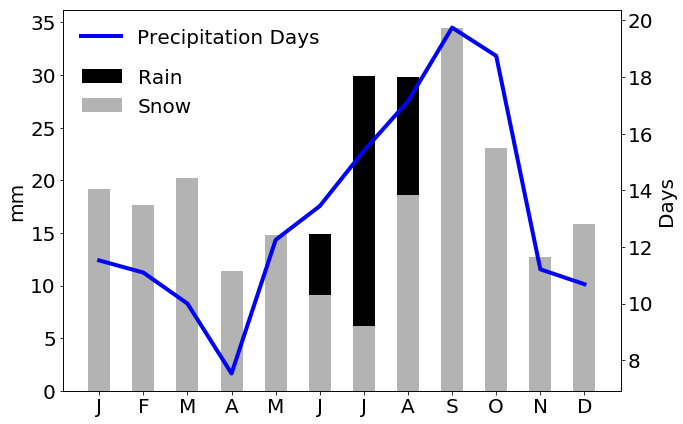

In [7]:
x = np.arange(1,13)
width = 0.5

fig, ax1 = plt.subplots(figsize=(10,7))

ax1.bar(x, dfAvg['Pc'], width=width, color='k', edgecolor='none', align='center', label='Rain')
ax1.bar(x, dfAvg['Psn'], width=width, color='0.7', edgecolor='none', align='center', label='Snow')
ax1.set_ylabel('mm', fontsize=20)

ax2 = ax1.twinx()
ax2.plot(x, dfAvg['DP'], ls='-', lw=4, color='b', label='Precipitation Days')
#ax2.plot(x, dfAvg['DPtot'], ls='--', lw=4, color='b', label='Precipitation days (incl. trace)')
ax2.set_ylabel('Days', fontsize=20)

ax1.set_xticks(x)
ax1.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'], fontsize=20)
ax1.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

ax1.legend(fontsize=20, frameon=False, loc=(0.02,0.7))
ax2.legend(fontsize=20, frameon=False)

fig.savefig(os.path.join(r'C:\Users\apbarret\Documents\Papers\Snow_on_seaice_precip','yang_npp_observed_precip_1979to1991.png'))

NameError: name 'df_satt' is not defined

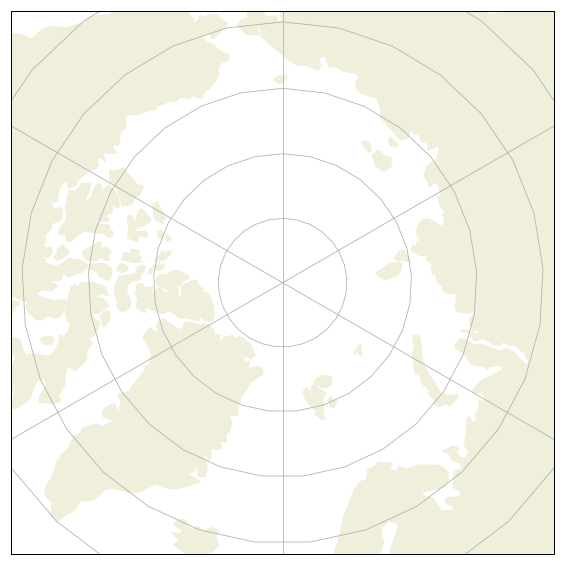

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
ax.set_extent([-180.,180.,65.,90.], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.gridlines()

xy = ccrs.NorthPolarStereo().transform_points(ccrs.PlateCarree(), df_satt['Lon'].values, df_satt['Lat'].values)
print(xy.shape)

ax.scatter(xy[:,0], xy[:,1])

plt.show()

In [9]:
def get_bogdanova_monthly():
    """Returns monthly corrected precipitation from Bogdanova et al.  2002."""
    return pd.DataFrame([12.5, 9.5, 9.5, 7.4, 9.2, 12.4, 23.7, 22.4, 20.3, 15.3, 11.1, 11.1,],
                        index=np.arange(1,13), columns=['P'])

In [10]:
dfBog = get_bogdanova_monthly()


In [11]:
dfAvgAll = df[df['YY'] >= 79].groupby('MM').mean()[['Pg','Pc','DP','Dtc','snow%']]

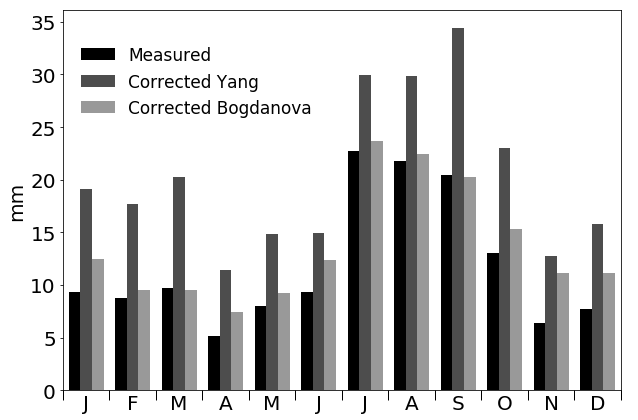

In [12]:
x = np.arange(1,13)
xm = x-0.25
xy = x
xb = x+0.25
width = 0.25

fig, ax = plt.subplots(figsize=(10,7))

ax.set_xlim(0.5,12.5)

ax.bar(xm, dfAvgAll['Pg'], width=width, color='k', edgecolor='none',
       align='center', label='Measured')
ax.bar(xy, dfAvgAll['Pc'], width=width, color='0.3', edgecolor='none',
       align='center', label='Corrected Yang')
ax.bar(xb, dfBog['P'], width=width, color='0.6', edgecolor='none',
       align='center', label="Corrected Bogdanova")

ax.set_ylabel('mm', fontsize=20)

# Make ticks at 'month' boundaries and ticklabels at center
major = np.arange(1.,13.,1.)
minor = np.arange(0.5,13.,1.)
ax.xaxis.set_major_locator(ticker.FixedLocator(major))
ax.xaxis.set_minor_locator(ticker.FixedLocator(minor))
ax.set_xticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'],
                   fontsize=20)
ax.tick_params('x', which='major', length=0, labelsize=20)
ax.tick_params('x', which='minor', width=1., length=10)
ax.tick_params('y', labelsize=20)

ax.legend(fontsize=17, frameon=False, loc=(0.02,0.7))

fig.savefig(os.path.join(r'C:\Users\apbarret\Documents\Papers\Snow_on_seaice_precip','npp_observed_precip_compare_corrections_1952to1991.png'))

In [14]:
dfAvgAll['Pc'][(dfAvgAll.index <= 4) | (dfAvgAll.index >= 8)].sum()

184.33568480023587

In [15]:
dfBog['P'][(dfBog.index <= 4) | (dfBog.index >= 8)].sum()

119.1